In [175]:
from data.db import Database
import pandas as pd

In [176]:
file =open('History_1856040379.csv', encoding='utf-8')
col = file.readline().strip().replace('"','').split(',')
col.pop(3)

print(col)


['id', 'number', 'photo', 'description', 'rating']


In [177]:
df = pd.DataFrame(columns = col[1:])
df

,number,photo,description,rating


In [178]:
infos = file.readlines()

In [179]:
print(infos)

['1,1,"1.jpg",NULL,"няшечка, но железо на губах портит",6\n', '2,2,"2.jpg",NULL,"система десятибальная такая поощерительная, пипяо, ну так вот, тело имба, лицо не оч, губа приподнята, а так сильно, д1(тело аскета)",7\n', '3,3,"3.jpg",NULL,"Она полновата, могло быть лучше, не люблю оттопыренные уши(привет Леня). А так прикольно, просто не мои стандарты",4\n', '4,4,"4.jpg",NULL,"Хорошие бубы, талия часики(кайф), прическа вроде бы нормик, но вот лицо не супер, могло быть лучше",6\n', '5,5,"5.jpg",NULL,"Блин, кайф, и косплей Марины прикольный, и сама косплеерша. Лицо меня устраивает, очень даже. Иммортал1",9\n', '6,6,"6.jpg",NULL,"Как же хорошо она спрятала весь вес, просто чек, все руки, талию и тд спрятала, лицо милое, волосы нормик, п3",5\n', '7,7,"7.jpg",NULL,"Если что, она по уровню как ,,тасамая из класса,, впринципе дефолт, но нет проблем в внешке",5\n', '8,8,"8.jpg",NULL,"Маленькие дети в взрослых играх не очень. Не могу оценивать, неинтересная для меня",3\n', '9,9,"9.jpg",NULL,"Да

In [180]:
for i in infos:
    left, right = i.split(',NULL,')
    left = left.replace('"','').split(',')
    right = right[1:].strip().split('",')
    if len(right) == 1:
        print(left,right)
    dct = {
        'number': int(left[1]),
        'photo': left[2],
        'description': right[0],
        'rating': int(right[1])
    }
    new_row = pd.Series(dct)
    df.loc[int(left[0])] = new_row
    


In [181]:
df

,number,photo,description,rating
1,1,1.jpg,"няшечка, но железо на губах портит",6
2,2,2.jpg,"система десятибальная такая поощерительная, пи...",7
3,3,3.jpg,"Она полновата, могло быть лучше, не люблю отто...",4
4,4,4.jpg,"Хорошие бубы, талия часики(кайф), прическа вро...",6
5,5,5.jpg,"Блин, кайф, и косплей Марины прикольный, и сам...",9
...,...,...,...,...
175,171,AgACAgIAAxkBAAIGAAFnWFm_MkNvtJ5sSuvQcePU6zVnBA...,"Не лучшая форма лица, есть плюс вайб, плохие п...",3
176,172,AgACAgIAAxkBAAIGAWdYWb8l3XnqKwUNMpNuNaoHMq4cAA...,Очень похожая есть фотка одной твич стримерши....,5
177,173,AgACAgIAAxkBAAIGAmdYWb9pquxyHAa7s2LK5_BXdPaSAA...,"Некрутые пропорции, могло быть намного лучше, ...",3
178,174,AgACAgIAAxkBAAIGA2dYWb8vZVdTxocFt59MKh22S8qJAA...,"Крутая форма лица, красивая внешность, есть не...",5


In [182]:
import matplotlib.pyplot  as plt
import seaborn as sn

In [183]:
dct = df['rating'].value_counts()
dct

rating
4     56
5     48
3     25
6     19
7     15
2      9
8      4
9      1
1      1
10     1
Name: count, dtype: int64

<Axes: xlabel='rating', ylabel='count'>

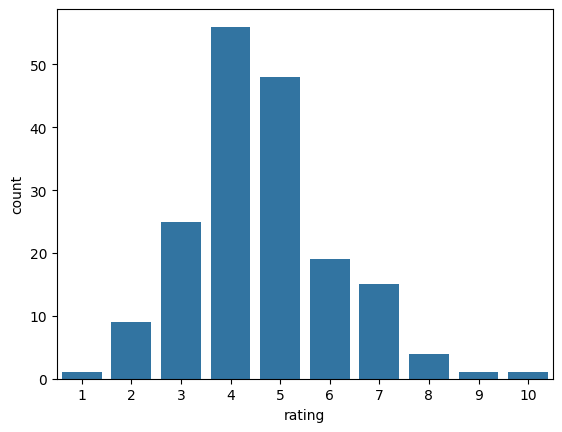

In [184]:
sn.barplot(data =dct)

In [185]:
dct

rating
4     56
5     48
3     25
6     19
7     15
2      9
8      4
9      1
1      1
10     1
Name: count, dtype: int64